In [ ]:
import pandas as pd  # This imports the pandas library

In [ ]:
df=pd.read_csv("/content/loan.csv") # Load the loan data from a CSV file into a pandas DataFrame

In [ ]:
df.head(5) # Display the first 5 rows of the DataFrame

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [ ]:
df.info() # Get information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         614 non-null    float64
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(5), int64(2), object(6)
memory usage: 62.5+ KB


In [ ]:
df.columns # Display all column names in the DataFrame

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
df.isnull().sum() # Calculate the number of missing values in each column

,0
Loan_ID,0
Gender,13
Married,3
Dependents,0
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
import missingno as msno # Import the missingno library for visualizing missing data patterns

<Axes: >

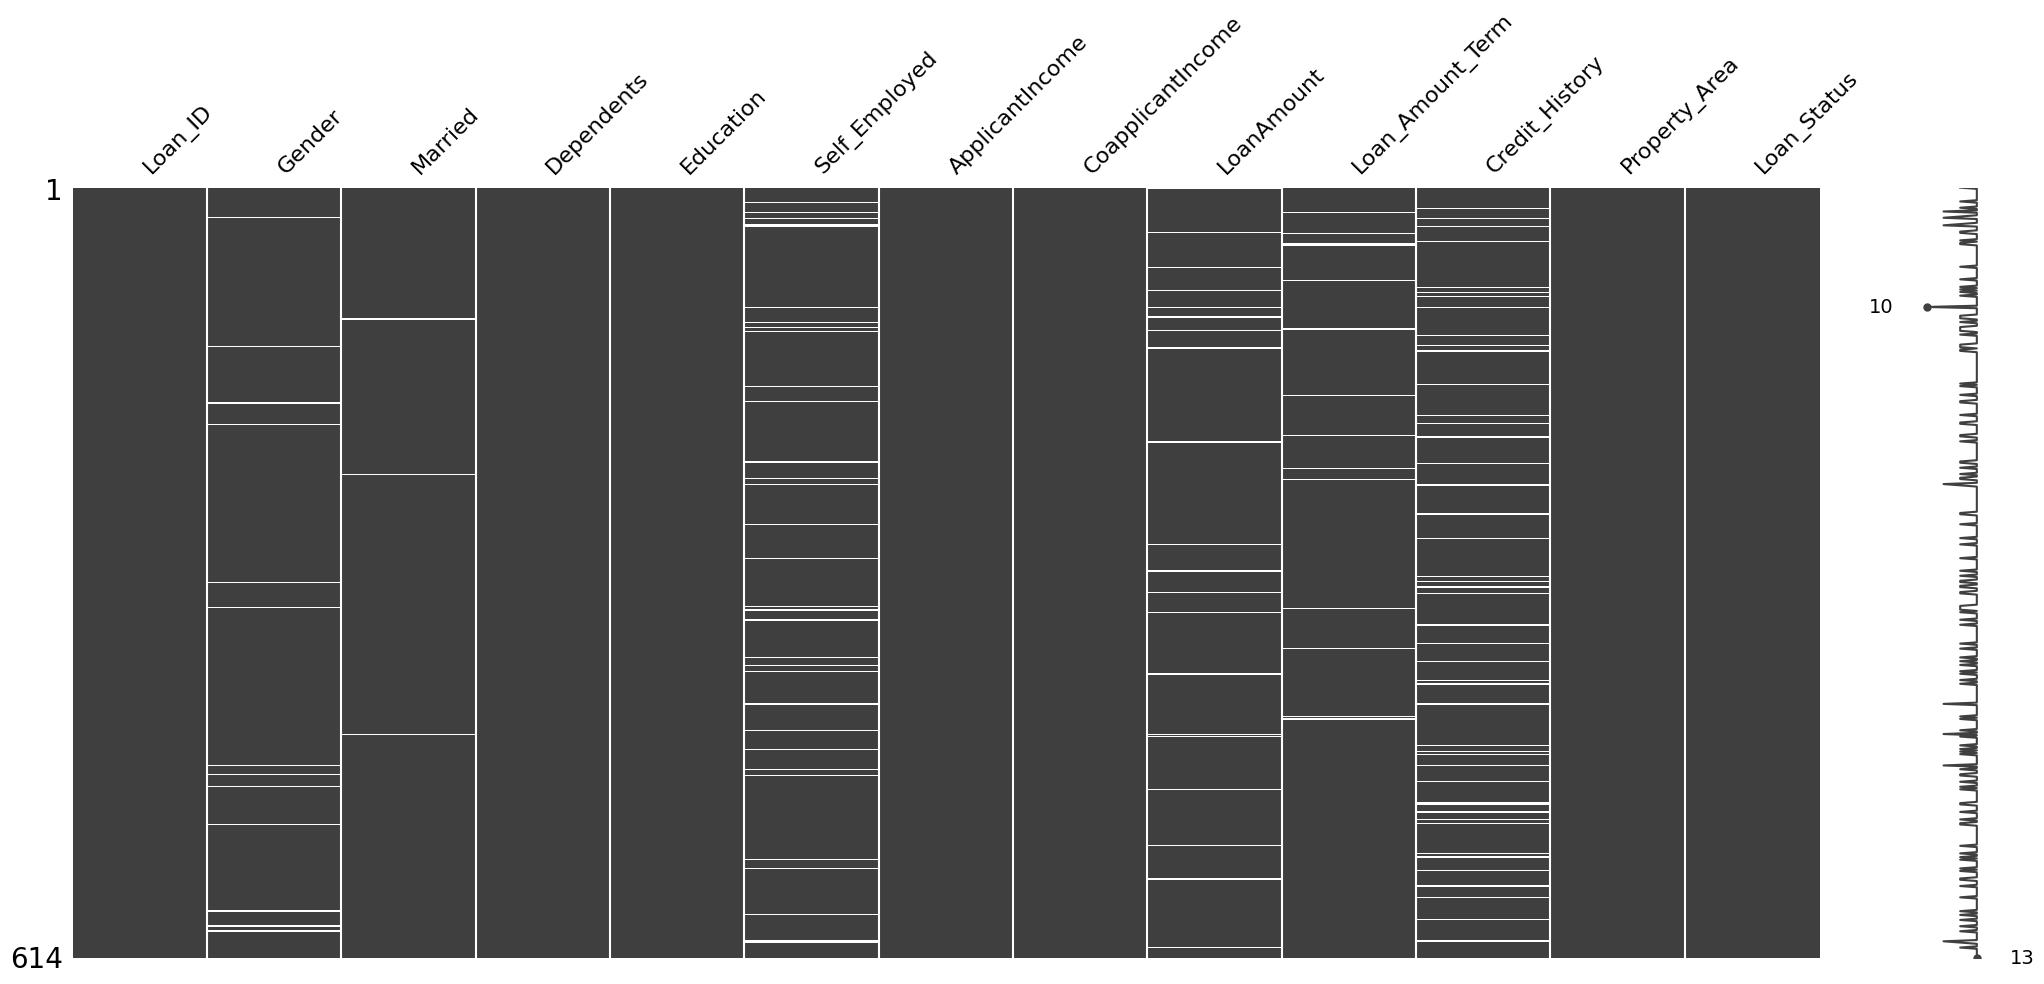

In [ ]:
msno.matrix(df) # Create a matrix visualization of missing values in the DataFram

In [ ]:
df['Gender']=df['Gender'].fillna(df['Gender']=='not specified') # Fill missing values in the 'Gender' column with 'not specified'

In [ ]:
df['Married']=df['Married'].fillna(df['Married']=='not specified') #  Fill missing values in the 'Married' column with 'not specified'

In [ ]:
df.isnull().sum() # Recalculate and display the number of missing values in each column after filling

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed']=='not specified') # Fill missing values in the 'Self_Employed' column with 'not specified'

In [ ]:
from sklearn.impute import KNNImputer # Import the KNNImputer class from scikit-learn for imputing missing values
knn=KNNImputer(n_neighbors=3) # Create a KNNImputer instance with 3 nearest neighbors for imputation
df['LoanAmount']=knn.fit_transform(df[['LoanAmount']]) # Impute missing values in the 'LoanAmount' column using KNN imputation
# fit_transform() fits the imputer on the data and transforms it in one step

In [ ]:
df['Loan_Amount_Term']=knn.fit_transform(df[['Loan_Amount_Term']]) # Impute missing values in the 'Loan_Amount_Term' column using KNN imputation

In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean()) # Fill missing values in the 'Credit_History' column with the mean value

In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,1
6,LP001013,Male,Yes,0.0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,1
7,LP001014,Male,Yes,3.0,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,0
8,LP001018,Male,Yes,2.0,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,1
9,LP001020,Male,Yes,1.0,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,0


In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
X=df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History']] # Selecting the features

In [ ]:
y=df['Loan_Status'] # Selecting the target variable (dependent variable) for the model

In [ ]:
from sklearn.preprocessing import MinMaxScaler # imprort Minmaxscalar for preprecessing the data

In [ ]:
minmax=MinMaxScaler() # Create a MinMaxScaler instance

In [ ]:
minmax.fit(X)

MinMaxScaler()

In [ ]:
X=minmax.transform(X) # Transform the features using the MinMaxScaler

In [ ]:
from sklearn.model_selection import train_test_split # Import the train_test_split function from scikit-learn for splitting the data into training and testing sets

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42) # Split the data into training and testing sets with a test size of 20%

In [ ]:
from sklearn.linear_model import LogisticRegression # Import the LogisticRegression class from scikit-learn for building a logistic regression model

In [ ]:
lrm=LogisticRegression() # create aan instance for Logistic regression model

In [ ]:
lrm.fit(X_train,y_train) # fit the trained data

LogisticRegression()

In [ ]:
ypred=lrm.predict(X_test) # make predictions on the test data

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report # Import the necessary metrics for evaluating the model's performance

In [ ]:
acs=accuracy_score(y_test,ypred) # Calculate the accuracy score

In [ ]:
cm=confusion_matrix(y_test,ypred) # Create a confusion matrix

In [ ]:
rpt=classification_report(y_test,ypred) # Generate a classification report

In [ ]:
print("Accuracy Score:",acs) # Print the accuracy score

Accuracy Score: 0.7886178861788617


In [ ]:
print(rpt)

              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import the DecisionTreeClassifier class from scikit-learn for building a decision tree model

In [ ]:
dct=DecisionTreeClassifier() # Create an instance of the DecisionTreeClassifier

In [ ]:
dct.fit(X_train,y_train) # Fit the decision tree model on the training data

DecisionTreeClassifier()

In [ ]:
y_pred_dct=dct.predict(X_test) # Make predictions on the test data using the trained decision tree model

In [ ]:
acs_dct=accuracy_score(y_test,y_pred_dct) # Calculate the accuracy score for the decision tree model

In [ ]:
acs_dct

0.7398373983739838

In [ ]:
rpt_dct=classification_report(y_test,y_pred_dct) # Generate a classification report for the decision tree model

In [ ]:
print(rpt_dct)

              precision    recall  f1-score   support

           0       0.63      0.60      0.62        43
           1       0.79      0.81      0.80        80

    accuracy                           0.74       123
   macro avg       0.71      0.71      0.71       123
weighted avg       0.74      0.74      0.74       123



In [ ]:
from tensorflow.keras.models import Sequential # Import the Sequential model from TensorFlow Keras for building a neural network model
from tensorflow.keras.layers import Dense # Import the Dense layer from TensorFlow Keras for defining the layers of the neural network

In [ ]:
model=Sequential() # Create an instance of the Sequential model

In [ ]:
model.add(Dense(64,activation='relu',input_dim=5)) # Add a dense layer with 128 units, ReLU activation, and input dimension of

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.add(Dense(32,activation='relu')) # Add another dense layer with 64 units and ReLU activation

In [ ]:
model.add(Dense(1,activation='sigmoid')) # Add the output layer with 1 unit and sigmoid activation

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']) # Compile the model with the Adam optimizer, binary cross-entropy loss, and accuracy metric

In [ ]:
model.fit(X_train,y_train,epochs=10,batch_size=32) # Train the model on the training data for 10 epochs with a batch size of 32

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7037 - loss: 0.6484
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7008 - loss: 0.5996 
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7016 - loss: 0.5591
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6900 - loss: 0.5618 
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8135 - loss: 0.5377 
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7938 - loss: 0.5291 
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8050 - loss: 0.5037 
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8320 - loss: 0.4588 
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8229 - loss: 0.4628 
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8119 - loss: 0.4638


In [ ]:
y_pred_nn=model.predict(X_test) # Make PREDICTIONS ON THE MODEL USING trained neural network model

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


In [ ]:
y_pred_nn=y_pred_nn>0.5 # Convert the predicted probabilities to binary predictions (0 or 1)

In [ ]:
rpt_nn=classification_report(y_test,y_pred_nn) # Generate a classification report for the neural network model

In [ ]:
acs_nn=accuracy_score(y_test,y_pred_nn) # Calculate the accuracy score for the neural network model

In [ ]:
print(rpt_nn)

              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [ ]:
print(acs)

0.7886178861788617


In [ ]:
print(acs_dct)

0.7398373983739838


In [ ]:
print(acs_nn)

0.7886178861788617


In [ ]:
import pickle as pl


In [ ]:
with open('loan.pkl','wb') as f:
  pl.dump(lrm,f)


In [ ]:
with open('loanmodel.pkl', 'wb') as f:
    pl.dump(rpt_nn, f)

Sequential Model and Logistic regression model is suitable to fit my data as it is given highest accuarcy score

Data Preprocessing: The code highlights the significance of data preprocessing. Steps like filling missing values (using imputation techniques and mean), scaling numerical features using MinMaxScaler, and splitting data into training and testing sets are crucial for building a robust machine learning model.

Model Comparison: Evaluating different machine learning models (Logistic Regression, Decision Tree, Neural Network) allowed for comparing their performance on this specific task.

Model Evaluation: The use of metrics such as accuracy score and classification report provided a comprehensive understanding of the models' effectiveness. It shows how to assess the model's performance based on predictions on the test data.

Neural Network Applicability: Using a neural network with carefully selected layers, activation functions, and an optimizer (Adam) demonstrated the potential of applying deep learning techniques to classification problems. While not explicitly stated, neural networks might offer greater flexibility and capture complex relationships within the data.

Saving the Model: The use of pickle to save the logistic regression model is a crucial step for model deployment. This enables using the trained model in future applications without retraining.